## Quiz 2 Part 2: Model Report

As budding Data Scientists, one of the tasks that you have to do after building you model is to create a model report. The model report acts as a documentation to understand the analytic approach that was done in order to solve a problem. This documentation is important since it allows your colleagues to review and critic your approach.  

The following are the different sections of the model report:
- Summary - This contains a high level description of the approach done to solve the problem along with the resultsand findings of your study.
- Data Preprocessing - This section contains a short description and shows the code on how the data was processed to prep it for modeling
- Model Development - This section contains a short description and the code as to how the model was developed
- Results/Model Performance - This section contains a summary of the different algorithms used and metrics that was achieved in the model development phase
- Model Interpretability - This section discusses the important features used by the model and insights on the top features. Model here will be the model recommended by the data scientist that business will use.
- Recommendation - This section details the next steps and improvements that can be done

You are applying for a Data Scientist position at Keebs Loan. You have been asked to create a draft model report which contains the different sections mentioned and will be evalulated based on the rubric placed in Canvas. The interviewer has also placed an additional constraint, **you are not allowed to use KNN or Logistic Regression for the report and have been requested to impute missing values instead of dropping them.**

## Dataset

You are to build a classification model the determines whether a loan for building a home will be approved or not. The following are the features of the dataset:

1.LoanID= Unique Loan ID <br>
2.Gender= Male/ Female <br>
3.Married= Applicant married (Y/N) <br>
4.Dependents= Number of dependents <br>
5.Education= Applicant Education (Graduate/ Under Graduate) <br>
6.SelfEmployed= Self-employed (Y/N) <br>
7.ApplicantIncome= Applicant income <br>
8.CoapplicantIncome= Coapplicant income <br>
9.LoanAmount= Loan amount in thousands <br>
10.LoanAmountTerm= Term of the loan in months <br>
11.CreditHistory= Credit history meets guidelines <br>
12.PropertyArea= Urban/ Semi-Urban/ Rural <br>
13.LoanStatus= **(Target)** Loan approved (Y/N) <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# data_df = pd.read_csv("../../data/loan_approval.csv")
data_df = pd.read_csv("loan_approval.csv")
data_df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
data_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## <span style="color:blue">Summary</span>

This section contains an overview on the methodology, findings and insights from the research

The task was completed using 3 black box models of SVM, Random Forests, and XGBoost in order to maximize prediction scores.

The first step was data preprocessing which involved encoding categorical data, turning strings to binaries, creating ordinal mappings, and imputing numerical values. Loan_ID was also dropped.

The resulting dataframe used `Loan_Status` as the prediction label y, while all other features were stored as X. 

A train_test_split was performed, with test_size 0.20.

Each model was created and automatically tuned using cross validation techniques of RandomizedSearch or BayesSearch.

We extracted the best_estimator and based predictions on that. The values would differ per run but all 3 models are remarkably close in scores with little signs of overfitting as training and test scores were close.

Primary scoring metrics utilized precision and specificity to gauge how well the True predictions are performing and its susceptibility to False Positives. This is so we'd avoid approving loans to wrong applicants.

The metrics showed impressive prediction capability in approving loans but still some confusion in determining false positives. 

Lastly we took a look at the weights driving the model's decisions.

For random forest, the weights would shift if the trees kept changing but results consistently showed Credit_History, Loan and Income amount to be important features.

PDP showed us more trends and the most unexpected was that loan term does not have a change in trend between different durations. Most trends were observed to be direct relationship such as Marriage, Education, and so on...

Lastly LIME, showed its application if we were interested in further analyzing wrong predictions as these allow us to visualize the difference between a good and bad predictions' weights' effects.

Among the feature weights found, we'd like to suggest removing or weakening Credit_History in the future. It's a binary feature that is given too much levarage seen in global weights. Thankfully though LIME at least shows, that it doesn't have too much weight in individual predictions.

While our predictions may suffer, removing `Credit_History` will help reduce its chances of generating False Positives as a simple `1` can skew the results if left unchecked. Future data collection could improve on expanding `Credit_History` to perhaps a credit score ranking or numerical data on past financial savings. 

In addition, we recommend the improvement of data collection or sampling techniques to address the class imbalance of twice as many Approvals than Rejections. This would ensure that future models would fit both classes equally. 

<i>Why am i using 'we' and 'our' </i>(\*.\*)?

## <span style="color:blue">Data Preprocessing</span>

This section contains a short description explaining why the data was processed in a certain way and shows the code on how the data was processed to prep it for modeling.

To process the data, we primarly performmed encoding, rescaling, and conversions.

### Encoding
One Hot Encoding was used for categorical data such as `Gender`.
<br>Ordinal Mapping was used for those with ordinal values such as `Property_Area`.
<br>Binary encoding was used for strings with simple Yes or No values like `Married`, `Education`... 

### Scaling
The values of loans was set to ones instead of thousandths, in order to be consistent with incomes.

In addition, a StandardizedScaler was used afterwards on numerical values exceeding 1000 range, to help model computations.

### Engineering
No further feature engineering was done as we have plenty of seemingly independent variables.

It should be noted that it may be possible to create a `has_coapplicant` feature if coapplicant_income was 0, thereby indicating the absence of such a partner.
<br>However it may be prone to errors if coapplicant was indeed unemployed.

### EDA
The EDA we're focusing on would be the presence of multicollinearity and clusters.
<br>Identifying these could help us decide on an ideal model.

#### Begin
Call info() to see the  data types and null presence per feature.

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Our features with missing data are
<ul>
    <li>Gender               13</li>
    <li>Married               3</li>
    <li>Dependents           15</li>
    <li>Self_Employed        32</li>
    <li>LoanAmount           22</li>
    <li>Loan_Amount_Term     14</li>
    <li>Credit_History       50</li>
</ul>

### Categorical Data
#### 1. Gender: na=Unknown; One Hot
To begin preprocessing, let's start with **Gender** - a categorical value -.

For this method, we will be replacing missing values with `Unknown` then using a **One Hot Encoding** technique to create `Gender_Male`, `Gender_Female`, `Gender_Unknown`.

pandas has a built in method of `get_dummies()` to help us automatically generate new cols and auto discard the original col. 

In [5]:
df_imputed = data_df.copy()

df_imputed['Gender'].fillna('Unknown', inplace=True)
df_imputed = pd.get_dummies(df_imputed, prefix='Gender', columns=['Gender'])

df_imputed.tail()

Loan_ID Married Dependents Education Self_Employed  ApplicantIncome  \
609  LP002978      No          0  Graduate            No             2900   
610  LP002979     Yes         3+  Graduate            No             4106   
611  LP002983     Yes          1  Graduate            No             8072   
612  LP002984     Yes          2  Graduate            No             7583   
613  LP002990      No          0  Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  Gender_Female  Gender_Male  Gender_Unknown  
609         Rural           Y           True        False           False  
610         Rural           Y          False         True           False  
611         Urban           Y          False         True           False  
612         Urban           Y          False         True           False  
613     Semiurban           N           True        False           False

### 2. Married: na=No. String to binary

`Married` has missing values and is a question asking a positive.

Since no answer was provided, it's safe to assume the negative, of which is **Not Married**.

We will be filling missing values with `No` and converting to binary as a feature of `Is_Married`.

Alternatively, just create a new col and perform an equal comparison to `Yes`.

In [6]:
df_imputed['Is_Married'] = df_imputed['Married'] == 'Yes'

### 3. Depedents: na=0, String to int

#### Limitations: 3 is the max number.
Dependents is a string with missing values.

When a user leaves it as a blank/NaN. It most likely means a None or 0.

Since there's only a few string combinations, we will be using mapping.

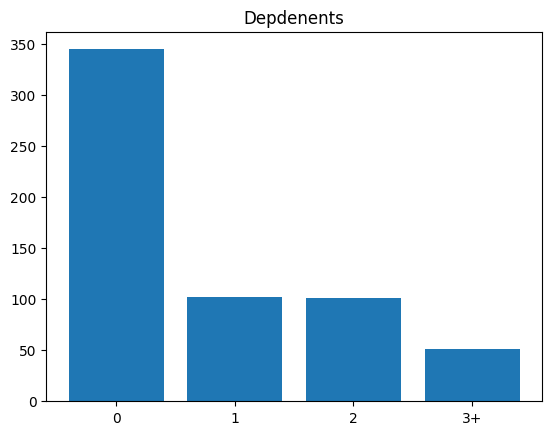

In [7]:
df_imputed[df_imputed['Dependents'].isna()]

hist_data = df_imputed['Dependents'].value_counts()
plt.bar(x=hist_data.index, height=hist_data.values)
plt.title('Depdenents')
plt.show()

In [8]:
df_imputed['Dependents'].fillna('0', inplace=True)
df_imputed['Number_Dependents'] = df_imputed['Dependents'].map({'0':0, '1':1, '2': 2, '3+':3})

### 4. Education: String to binary 
<i>No missing values</i>

For `Education`, we see that it's simply an indicator of whether one has graduated or not.

So let's create an `Is_Graduate` feature.

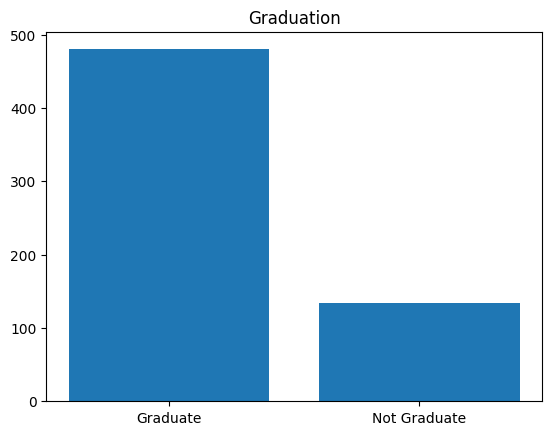

In [9]:
hist_data = df_imputed.Education.value_counts()

plt.bar(x=hist_data.index, height=hist_data.values)
plt.title('Graduation')
plt.show()

In [10]:
df_imputed['Is_Graduate'] = df_imputed['Education'] == 'Graduate'

### 5. Self_Employed: na=No, String to binary
Once again, is safe to assume the negative when a user fails to answer `Self_Employed` 

In [11]:
df_imputed.head(4)
df_imputed['Is_Self_Employed'] = df_imputed['Self_Employed'] == 'Yes'

### 6. Income are Complete.

Applicant always has income while it's reasonable for coapplicant to have 0's

In [12]:
(df_imputed[['ApplicantIncome', 'CoapplicantIncome']] <= 0).sum()

ApplicantIncome        0
CoapplicantIncome    273
dtype: int64

### 7. Loan_Amount: na=Median, Rescale thousands to ones.

We see there are a lot of outliers skewed towards one direction.
<br>The best imputation method for this would be using the median instead of mean.

Lastly, to keep monetary values consistent, let's convert the thousandths to ones.

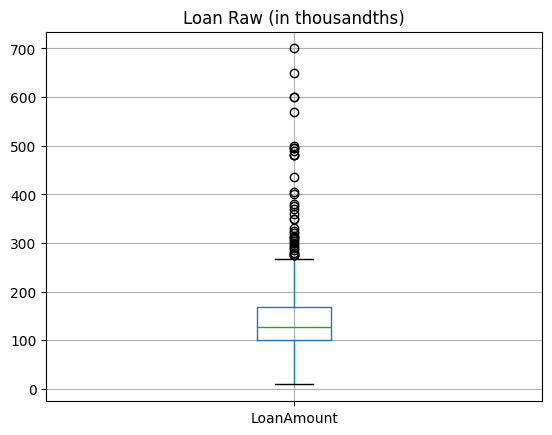

In [13]:
df_imputed.boxplot('LoanAmount')
plt.title('Loan Raw (in thousandths)')
plt.show()

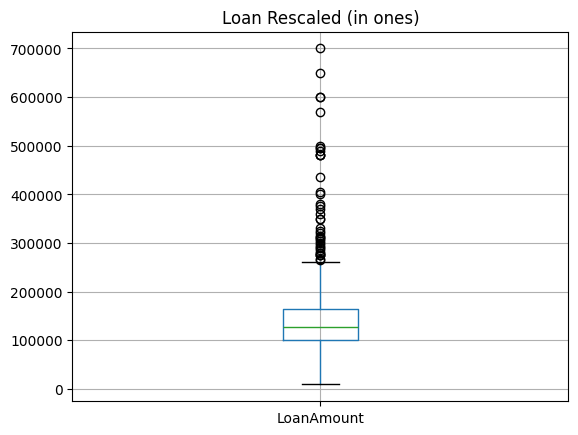

In [14]:
median = df_imputed['LoanAmount'].median()
df_imputed['LoanAmount'].fillna(median, inplace=True)
df_imputed['LoanAmount'] = df_imputed['LoanAmount'] * 1000

df_imputed.boxplot('LoanAmount')
plt.title('Loan Rescaled (in ones)')
plt.show()

### 8. Loan_Amount_Term: na=Mode; Rescale to years.

There's an overwhelming number of 360 month terms hence we will be using that.

In addition let's rescale to years.

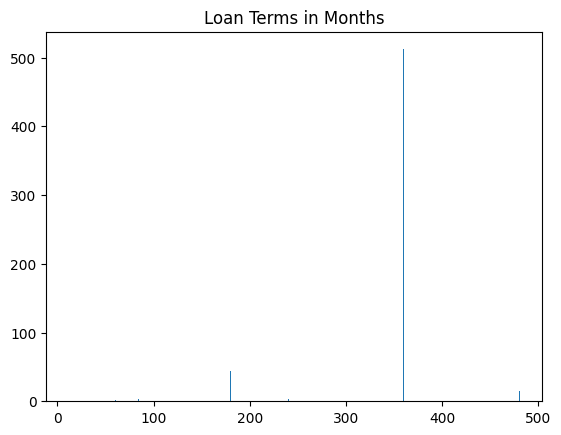

In [15]:
hist_data = df_imputed['Loan_Amount_Term'].value_counts()

plt.bar(x=hist_data.index, height=hist_data.values)
plt.title('Loan Terms in Months')
plt.show()

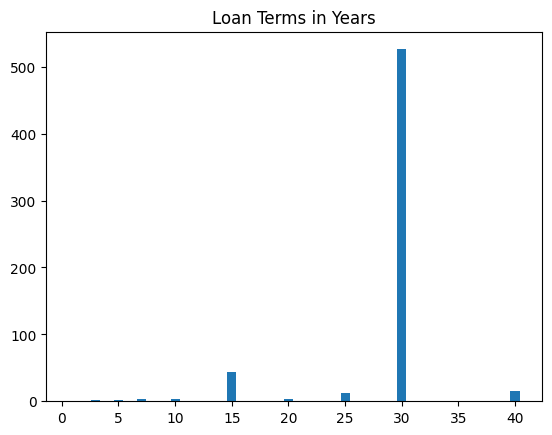

In [16]:
mode = df_imputed['Loan_Amount_Term'].mode()[0]
df_imputed['Loan_Amount_Term'].fillna(mode, inplace=True)
df_imputed['Loan_Amount_Term'] = df_imputed['Loan_Amount_Term'] / 12

hist_data = df_imputed['Loan_Amount_Term'].value_counts()

plt.bar(x=hist_data.index, height=hist_data.values)
plt.title('Loan Terms in Years')
plt.show()

### 9. Credit_History: na=0
Once again, no data could mean that the applicant indeed has no `Credit_History` so fill with 0.

In [17]:
df_imputed['Credit_History'].fillna(0, inplace=True)

### 10. Property_Area: String to int

Property area can be interpreted as 'Level of Development'.

Hence we can use ordinal remapping.

In [18]:
df_imputed['Property_Area'] = df_imputed['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})

### 11. Loan_Status: String to binary

Convert Y/N to binary

In [19]:
df_imputed['Loan_Status'] = df_imputed['Loan_Status'] == 'Y'

## Imputation and Conversion Results

In [20]:
df_imputed.drop(columns=['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed'], inplace=True)
df_imputed

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0    128000.0              30.0   
1               4583             1508.0    128000.0              30.0   
2               3000                0.0     66000.0              30.0   
3               2583             2358.0    120000.0              30.0   
4               6000                0.0    141000.0              30.0   
..               ...                ...         ...               ...   
609             2900                0.0     71000.0              30.0   
610             4106                0.0     40000.0              15.0   
611             8072              240.0    253000.0              30.0   
612             7583                0.0    187000.0              30.0   
613             4583                0.0    133000.0              30.0   

     Credit_History  Property_Area  Loan_Status  Gender_Female  Gender_Male  \
0               1.0              2         True          False         True   
1               1.0              0        False          False         True   
2               1.0              2         True          False         True   
3               1.0              2         True          False         True   
4               1.0              2         True          False         True   
..              ...            ...          ...            ...          ...   
609             1.0              0         True           True        False   
610             1.0              0         True          False         True   
611             1.0              2         True          False         True   
612             1.0              2         True          False         True   
613             0.0              1        False           True        False   

     Gender_Unknown  Is_Married  Number_Dependents  Is_Graduate  \
0             False       False                  0         True   
1             False        True                  1         True   
2             False        True                  0         True   
3             False        True                  0        False   
4             False       False                  0         True   
..              ...         ...                ...          ...   
609           False       False                  0         True   
610           False        True                  3         True   
611           False        True                  1         True   
612           False        True                  2         True   
613           False       False                  0         True   

     Is_Self_Employed  
0               False  
1               False  
2                True  
3               False  
4               False  
..                ...  
609             False  
610             False  
611             False  
612             False  
613              True  

[614 rows x 14 columns]

### Assign Features and Target Label

In [21]:
X = df_imputed.drop(columns=['Loan_Status'])
y = df_imputed['Loan_Status']

In [22]:
bool_cols = ['Gender_Female', 'Gender_Male', 'Gender_Unknown', 'Is_Married', 'Is_Graduate', 'Is_Self_Employed']
X[bool_cols] = X[bool_cols].astype('uint8')
X.dtypes

y = y.astype('uint8')

## Feature Scaling
We will be applying Standardized Scaling on featurees with large numerical values (> 1000).
This should help ease our model's compuatations.

Standardization was chosen as the presence of extreme outliers would greatly weaken MinMax scaling.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
cols_rescale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

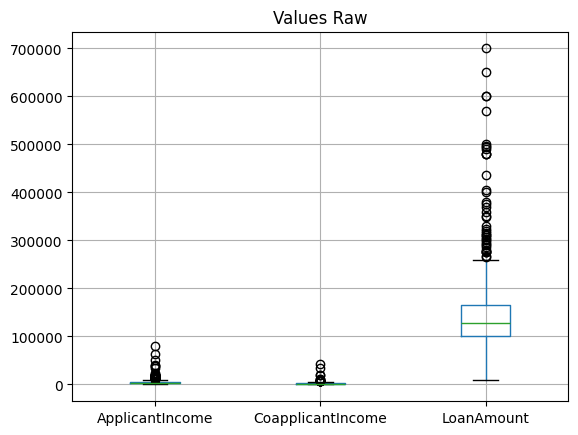

In [25]:
X[cols_rescale].boxplot()
plt.title('Values Raw')
plt.show()

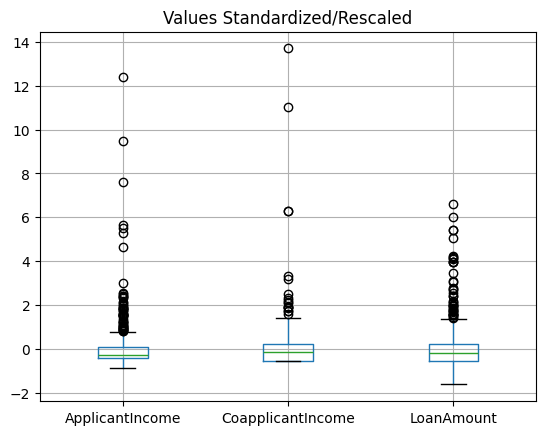

In [26]:
scaler = StandardScaler()
X[cols_rescale] = scaler.fit_transform(X[cols_rescale])

X[cols_rescale].boxplot()
plt.title('Values Standardized/Rescaled')
plt.show()

# EDA
Let's perform a brief EDA to see what features may be best utilized and the models best for it.

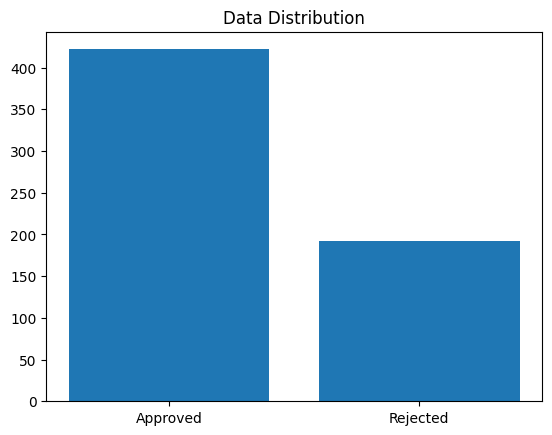

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [27]:
plt.bar(['Approved','Rejected'], y.value_counts())
plt.title('Data Distribution')
plt.show()
y.value_counts()

### Data Imbalance
We see a data imbalance with twice as many approvals than rejections.

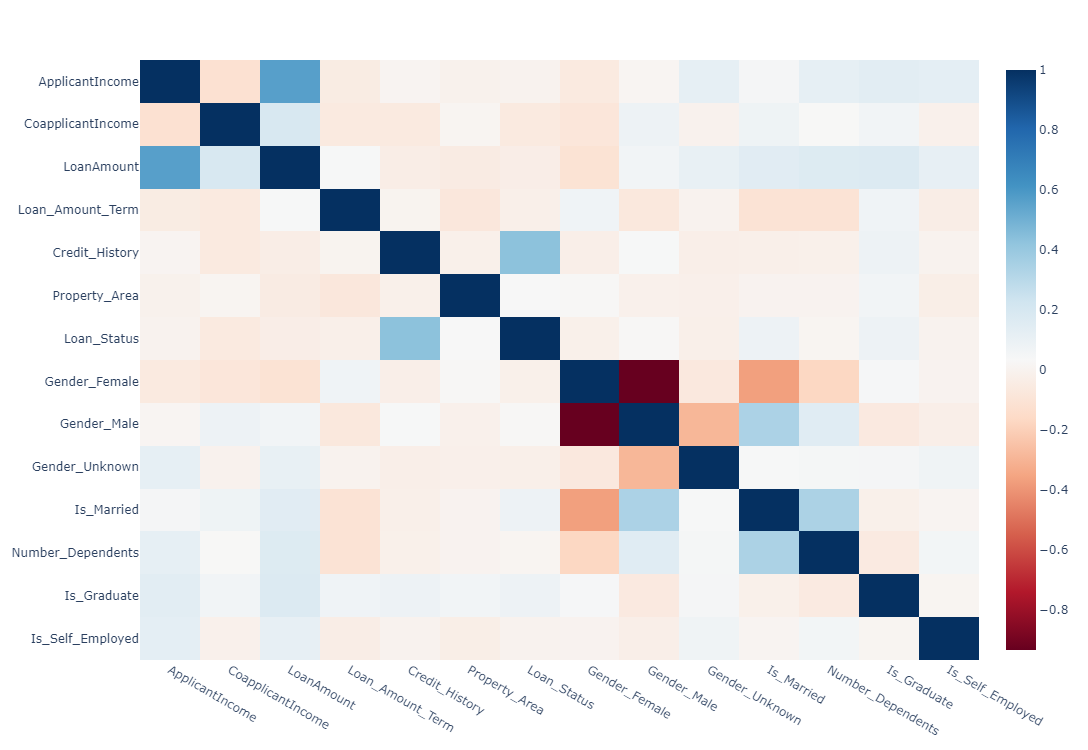

In [28]:
import plotly.express as px
px.imshow(df_imputed.corr(), height=750, aspect='auto', color_continuous_scale=px.colors.diverging.RdBu)

### Feature Correlation
Of those features related to Loan Approval, we see `Credit_History` to have a strong direct relationship.

We also see Gender have a relationship to `Is_Married`.

Lastly, the amount `Loaned` is (strongly) directly related to applicants `Income`.

Overall, we can return to these features and try backdropping them to see if model results would improve.

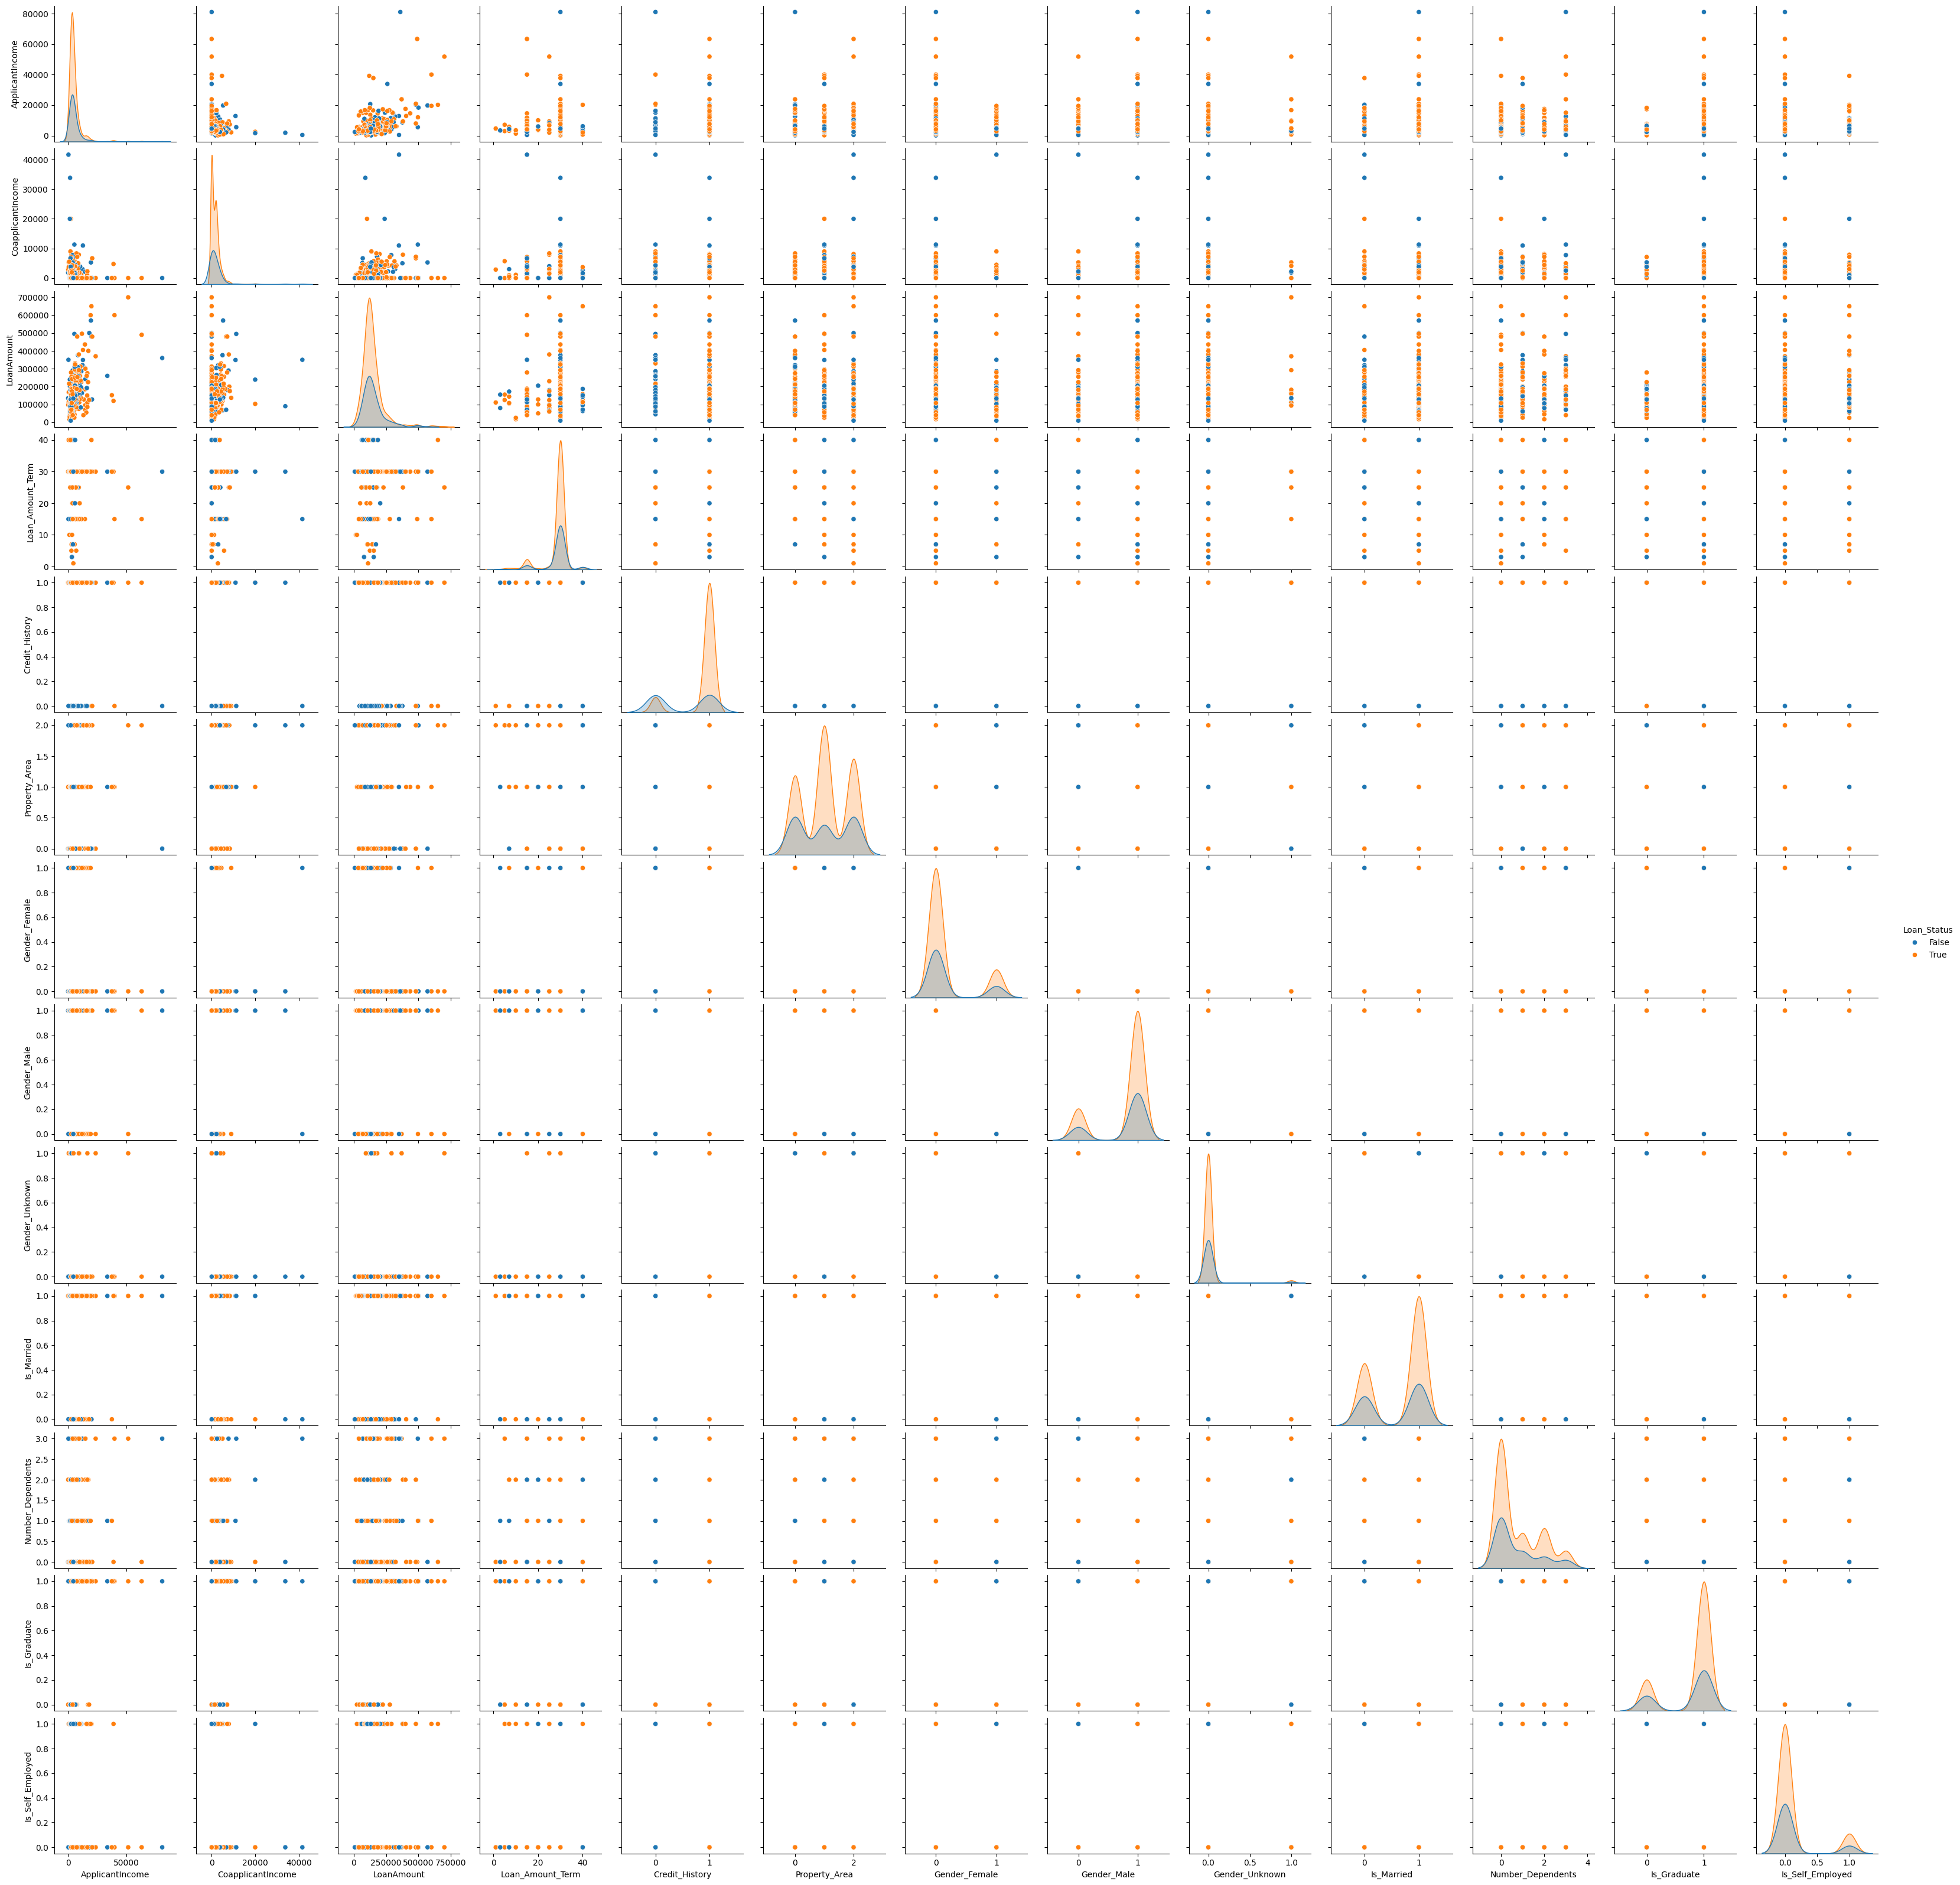

In [29]:
import seaborn as sns
sns.pairplot(df_imputed, hue='Loan_Status')
plt.show()

### Clustering
While difficult to visualize due to the small size, we do see that there are some clusters present among certain features.

In order to pull these clusters apart, we can attempt utilizing SVM or Decision Trees.

## <span style="color:blue">Model Development</span>

This section contains a short description and the code as to how the model was developed

### Model Workflow
The model creation process mostly involves using hyperparameter tuners like RandomizedSearch and BayesSearch.

These require the creation of a model, a set of hyperparameters values to combine, and a scorer to prioritize.
<br>Whatever cross validation method we use, it will automatically provide us the best value with regards to the scorer we passed. 

Flow
<ol>
    <li>Create model with set random_state.</li>
    <li>Create parameter ranges.</li>
    <li>Create scorer.</li>
    <li>Create cross validation technique and pass in the created items.</li>
    <li>Call fit(X_train, y_train) to train.</li>
    <li>From the best_estimator_, call predict(y_train) to gather results.</li>
    <li>Store results in `df_results`.</li>
</ol>

<i>Note that we automated the predict function to also generate a graph and DataFrame of results.</i>

### Models
The models used are **SVM, RandomForest, and XGBoost**. 
<br>These are powerful blackbox models that produce accurate results and should be able to perforn their own feature selection.


### Metric
One of the metrics we'll be utilizing is `specifity`.
<br>This is because we're more concerned about preventing loans given to the wrong people (actual negatives and false positives).
<br>Specifity is described as `quantifies the ability to avoid false positives`, which is inline with our goal.
<br>We don't want to provide loands to unsuitable applicants.

In addition, `precision` can be an important metric.
<br>This so we can gauge the model's positive predictions.
<br>We want to make sure it's only approving the correct (TP) applicants and not false positives (FP). 

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.metrics import specificity_score

## Data Prep

#### Lock a random_state for Reproduciility

In [31]:
random_state = 42

### Splitting by 20% test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (491, 13)
X_test:  (123, 13)
y_train:  (491,)
y_test:  (123,)


## 1. SVM

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [34]:
def get_Scores(model, cols=None, verbose=1):
        
    if cols is None:
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
    else:
        pred_train = model.predict(X_train[X_train.columns.drop(cols)])
        pred_test = model.predict(X_test[X_test.columns.drop(cols)])
    
    results = pd.DataFrame([[
                accuracy_score(pred_train, y_train), accuracy_score(pred_test, y_test),
                precision_score(pred_train, y_train), precision_score(pred_test, y_test),
                specificity_score(pred_train, y_train), specificity_score(pred_test, y_test),
                recall_score(pred_train, y_train), recall_score(pred_test, y_test)
            ]],
                columns=['Train Accuracy', 'Test Accuracy', 
                        'Train Precision', 'Test Precision',
                        'Train Specificity', 'Test Specificity',
                        'Train Recall', 'Test Recall'
                        ])

    if verbose == 1:
        fig = px.bar(results, barmode='group', labels={'value':'Score'})
        fig.show()
    return results

In [35]:
scorers = {
    'specifity_score': make_scorer(specificity_score),
}

In [36]:
param_grid = {
    'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100],
    'kernel': ['rbf']
}

svc_cv = RandomizedSearchCV(SVC(random_state=42), param_grid, 
                            scoring=scorers, refit='specifity_score', 
                            n_iter=42, cv=10,
                            n_jobs=-1, random_state=random_state)
svc_cv.fit(X_train, y_train) 

RandomizedSearchCV(cv=10, estimator=SVC(random_state=42), n_iter=42, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.001, 0.0001, 10, 100,
                                              1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001,
                                                  10, 100],
                                        'kernel': ['rbf']},
                   random_state=42, refit='specifity_score',
                   scoring={'specifity_score': make_scorer(specificity_score, response_method='predict')})

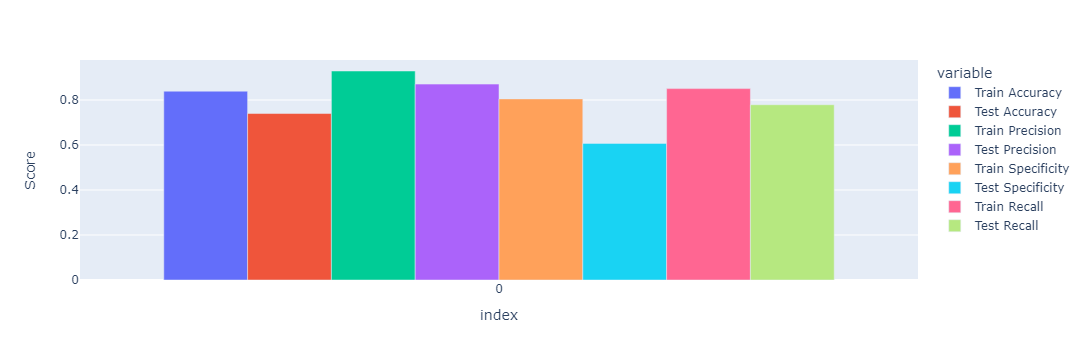

In [37]:
df_results = pd.DataFrame(index=['SVM', 'Random Forest', 'XGBoost'], columns=[
                        'Train Accuracy', 'Test Accuracy', 
                        'Train Precision', 'Test Precision',
                        'Train Specificity', 'Test Specificity',
                        'Train Recall', 'Test Recall'
                        ])
df_results.loc['SVM'] = get_Scores(svc_cv.best_estimator_).values

## 2. Random Forest


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
skip_cv = False

In [40]:
forest = RandomForestClassifier(random_state=random_state)

if skip_cv:
    best_params = {
        'bootstrap': True,
         'ccp_alpha': 0.0,
         'class_weight': None,
         'criterion': 'gini',
         'max_depth': 6,
         'max_features': 0.5,
         'max_leaf_nodes': None,
         'max_samples': None,
         'min_impurity_decrease': 0.0,
         'min_samples_leaf': 0.1,
         'min_samples_split': 0.1,
         'min_weight_fraction_leaf': 0.0,
         'monotonic_cst': None,
         'n_estimators': 550,
         'n_jobs': None,
         'oob_score': False,
         'random_state': 42,
         'verbose': 0,
         'warm_start': False}
    rf_model = RandomForestClassifier(**best_params)
    rf_model.fit(X_train, y_train)
else:
    param_grid = {
        "n_estimators": range(100, 800, 10),
        "max_depth": range(5,15,1),
        "min_samples_split": np.arange(.1,.6,.1),
        "min_samples_leaf": np.arange(.1,.6,.1),
        "max_features": np.arange(0.1, 0.6, .1)
    }
    
    rf_cv = RandomizedSearchCV(forest, param_grid, 
                               scoring=scorers, refit='specifity_score',
                               n_iter=10, cv=10,
                               n_jobs=-1, 
                               random_state=random_state
                              )
                               
    rf_cv.fit(X_train, y_train)
    rf_model = rf_cv.best_estimator_

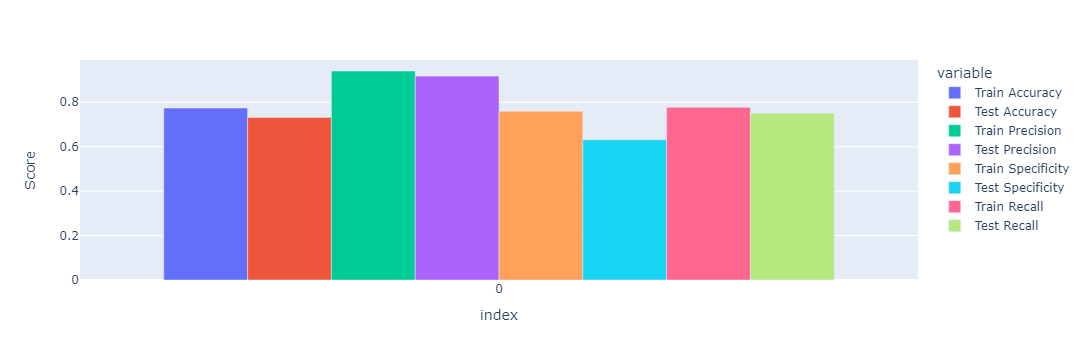

In [41]:
df_results.loc['Random Forest'] = get_Scores(rf_model).values

## 3. XGBoost
XGBoost is a gradient booster that sequentially improves on the last iteration.

Compared to other models, this one converges much faster at fewer iteration however it's score may be rather mediocre for this dataset.

In [42]:
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Integer as sk_Int
from skopt.space import Real as sk_Real

In [43]:
params_xgb = {
    # Name of the Model __ Parameter
    'max_depth' : sk_Int(2, 5),
    'learning_rate' : sk_Real(0.001, 1.0, prior='log-uniform'),
    'gamma' : sk_Real(0.0, 10.0),
    'reg_alpha' : sk_Real(0.0, 10.0),
    'reg_lambda' : sk_Real(0.0, 10.0),
    'subsample' : sk_Real(0.5, 1.0),
    'colsample_bytree' : sk_Real(0.5, 1.0),
    'colsample_bylevel' : sk_Real(0.5, 1.0),
    'colsample_bynode' : sk_Real(0.5, 1.0),
}

xgb_cv = BayesSearchCV(XGBClassifier(random_state=random_state), params_xgb,
              scoring=scorers, refit='specifity_score',
               n_iter=10, cv=10,
               n_jobs=-1, random_state=random_state)    

xgb_cv.fit(X_train, y_train)

BayesSearchCV(cv=10,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=Non...
                             'learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=5, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

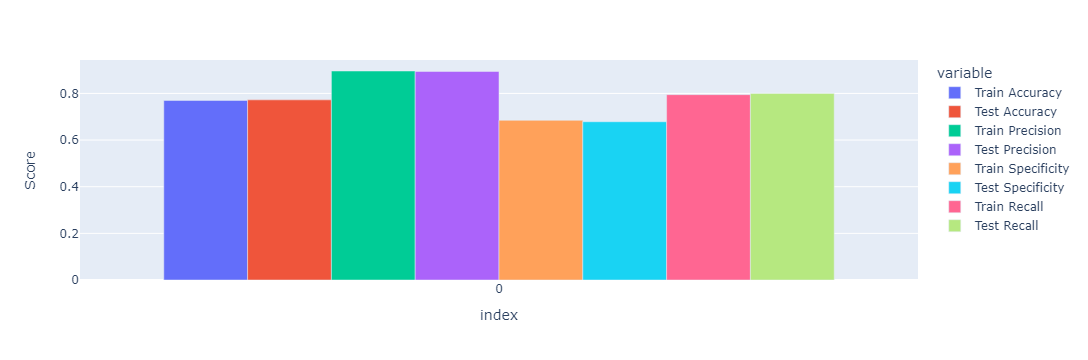

In [44]:
df_results.loc['XGBoost'] = get_Scores(xgb_cv.best_estimator_).values

## <span style="color:blue">Model Results</span>

This section contains a summary of the different algorithms used and metrics that was achieved in the model development phase

<i>Results may differ depending on run. random_state doesn't work for some reason.</i>

Using black box models, we are able to get impressive results.

`Precision` is extremely high indicating a great deal of confidence in trusting positive predictions made by these models. 

However `Recall` and `Specifity` are much lower indicating there's still confusion with False Negatives and False Positives, respectively.

We see low chances for overfitting as train and test scores are relatively close. 

In addition, we checked if dropping features had an effect on the prediction scores and the answer is no,unless the feature has a strong relationship with the label.
<br>Black Box Models' own feature selection seems to be effective in weighing their features.

| Algorithm | Metric 1 | Metric 2 | Metric 3 | Metric 4 |
|-----------|----------|----------|----------|----------|
| Sample      | 2%     | 3%     | 5%     | 6%     |
|           |          |          |          |          |
|           |          |          |          |          |

In [45]:
df_results

Train Accuracy Test Accuracy Train Precision Test Precision  \
SVM                 0.839104      0.739837        0.928783       0.870588   
Random Forest       0.773931      0.731707        0.940653       0.917647   
XGBoost             0.769857      0.772358        0.896142       0.894118   

              Train Specificity Test Specificity Train Recall Test Recall  
SVM                    0.804878         0.607143     0.850543    0.778947  
Random Forest          0.759036         0.631579     0.776961        0.75  
XGBoost                0.684685         0.678571     0.794737         0.8

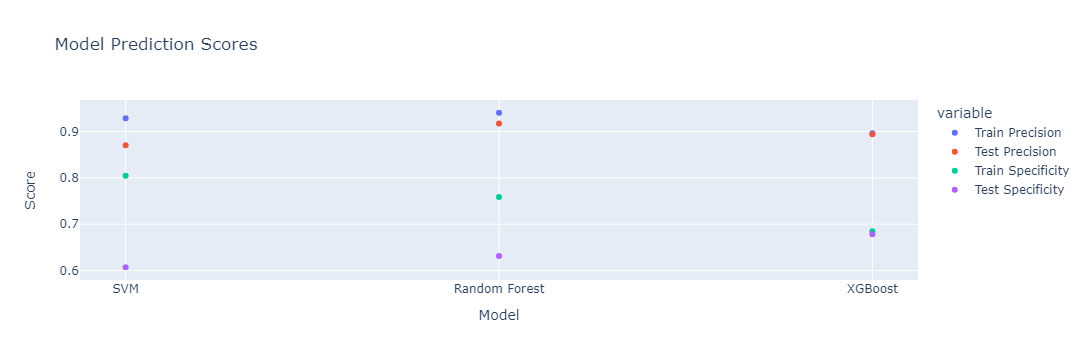

In [46]:
px.scatter(df_results[df_results.columns[2:6]], 
           title='Model Prediction Scores',
           labels={'value':'Score', 'index':'Model'}
          )

### Disccusion

<li>There doesn't appear to be any overfitting as our training and testing scores are close.</li>
<br>

The results appear somewhat similar across the board, so let's focus on the parameters we want.

#### Precision 
All models have remarkable precision. 
<br>Thereby indicating that whenever the model approves a loan, there's a low chance of it approving a False Positive.

#### Specificity
Unfortunately specificity doesn't have quite the impressive score.
<br>Meaning there's still some confusion between the applicants needing to be rejected. 

# Model Tweaking

We mentioned in the EDA that there were some correlated features let's see the effect of dropping them.

Let's do this on SVC since it's the quickest model.

In [47]:
df_backdropped_features = pd.DataFrame(columns=[df_results.columns], index=X_train.columns)

for col in X_train.columns:    
    print('Drop: ', col)
    svc_cv.fit(X_train.drop(columns=[col]), y_train)
    df_backdropped_features.loc[col] = get_Scores(svc_cv.best_estimator_, col, verbose=0).values

Drop:  ApplicantIncome
Drop:  CoapplicantIncome
Drop:  LoanAmount
Drop:  Loan_Amount_Term
Drop:  Credit_History
Drop:  Property_Area
Drop:  Gender_Female
Drop:  Gender_Male
Drop:  Gender_Unknown
Drop:  Is_Married
Drop:  Number_Dependents
Drop:  Is_Graduate
Drop:  Is_Self_Employed


In [48]:
df_backdropped_features

Train Accuracy Test Accuracy Train Precision Test Precision  \
ApplicantIncome         0.835031      0.747967        0.928783       0.894118   
CoapplicantIncome       0.816701      0.739837        0.919881       0.847059   
LoanAmount              0.826884      0.764228        0.922849       0.894118   
Loan_Amount_Term        0.796334      0.772358        0.910979       0.894118   
Credit_History          0.894094      0.666667        0.988131       0.870588   
Property_Area           0.832994      0.747967        0.925816       0.882353   
Gender_Female           0.841141      0.756098        0.925816       0.894118   
Gender_Male             0.841141      0.756098        0.925816       0.894118   
Gender_Unknown          0.839104      0.739837        0.928783       0.870588   
Is_Married              0.843177      0.747967        0.928783       0.882353   
Number_Dependents       0.830957      0.747967        0.925816       0.894118   
Is_Graduate             0.835031      0.756098        0.922849       0.894118   
Is_Self_Employed        0.841141      0.739837        0.925816       0.894118   

                  Train Specificity Test Specificity Train Recall Test Recall  
ApplicantIncome            0.801653             0.64     0.845946     0.77551  
CoapplicantIncome          0.771186          0.59375     0.831099    0.791209  
LoanAmount                 0.785124         0.666667     0.840541    0.791667  
Loan_Amount_Term           0.736842         0.678571     0.814324         0.8  
Credit_History             0.963636         0.421053     0.874016    0.711538  
Property_Area              0.795082          0.62963     0.845528     0.78125  
Gender_Female              0.801587         0.653846     0.854795    0.783505  
Gender_Male                0.801587         0.653846     0.854795    0.783505  
Gender_Unknown             0.804878         0.607143     0.850543    0.778947  
Is_Married                    0.808          0.62963     0.855191     0.78125  
Number_Dependents          0.793388             0.64     0.843243     0.77551  
Is_Graduate                   0.792         0.653846     0.849727    0.783505  
Is_Self_Employed           0.801587            0.625     0.854795    0.767677

### Discussion
Overall we don't really see much difference when dropping individual features.
<br>The only exception being `Credit_History` as it's directly correlated to `Loan_Status`.

While we could continue dropping more features, it is highly unlikely to produce a difference unless has a relationship with the label.

## <span style="color:blue">Model Interpretability</span>

This section discusses the important features used by the best performing model and insights on the top features.

Model Interpretability helps us to analyze the models and the weights they found.

### Model Weights
One method is asking the model itself for the feature weights. In a run we saw similar results to our EDA correlation matrix of `Credit_History` being a key driver.
<br>While simple, it doesn't provide any futher info on how the weight behaves other than magnitude.

### PDP
Partial Dependence Plots reveal a lot more information on trends to see what values may cause spikes, rises, and falls in data.

This information is useful in analyzing certain value ranges, such as why there's a sudden drop even though an applicant can show a high income.  

### LIME
Compared to the previous methods, LIME is a more localized way of analyzing predictions.
<br>We provide it a single data point and see how each feature shifts it on what direction and magnitude.

This can be useful for cases where we want to analyze wrong predictions.
We can check how the values for the wrong one compare to a right one.

# Disclaimer 
## These were observations made during the run. 

Random Forests tend to dp different splits each run, so **results may differ than what is written**.

In [49]:
from sklearn.inspection import PartialDependenceDisplay

## Basic Feature Weight Plotting

We can plot the feature weights manually however this doesn't reveal much information other than magnitude.

For a run, we saw Credit_History to be the biggest weight, similar to our correlation graph.

In an alternative run, the amount of income and loan were the biggest weights.

In [50]:
# Rerun bcuz even with random_state and other params locked, results are still inconsistent.
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.5, min_samples_leaf=0.1,
                       min_samples_split=0.1, n_estimators=550,
                       random_state=42)

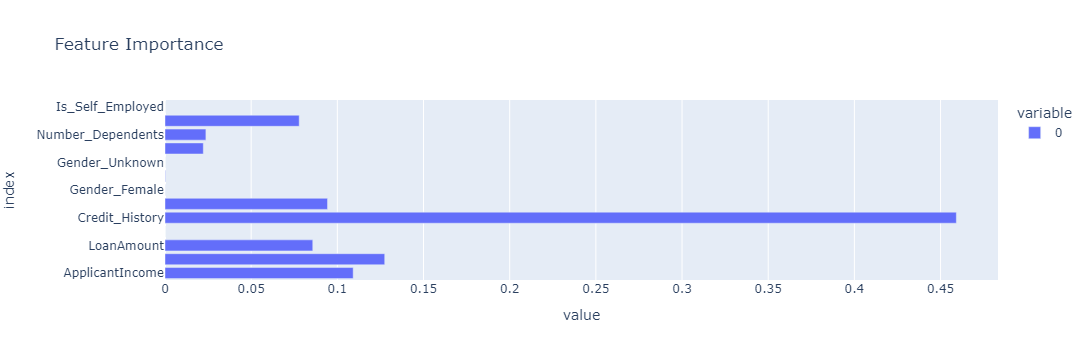

In [51]:
df_w = pd.DataFrame(rf_model.feature_importances_, index=rf_model.feature_names_in_)

px.bar(df_w, orientation='h', title='Feature Importance')

## Partial Depedence Plots
These plots help us to visualize the global trend of values.

In addition we are able to see the value ranges that affect these predictions.

For a smaple run, we saw that education, marriage, family (dependents), and a credit history will increase the chances for loan approval.

We also see that women are more likely to get approved loans than men.

Surprisingly, loan term doesn't affect the chances for a loan appproval.

Semi-urban property areas are also the most likely to get approved followed by urban then rural.

Lastly, we saw that income and loan amount generally trend upwards then falls again. 
<br>Indicating that there's only a specific threshold considered and exceeding it will decrease the chances for loan approval.

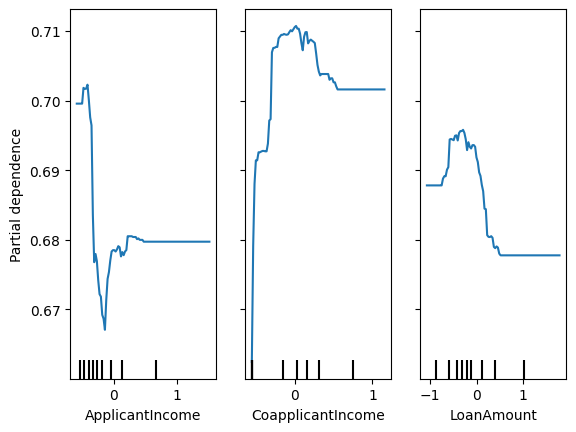

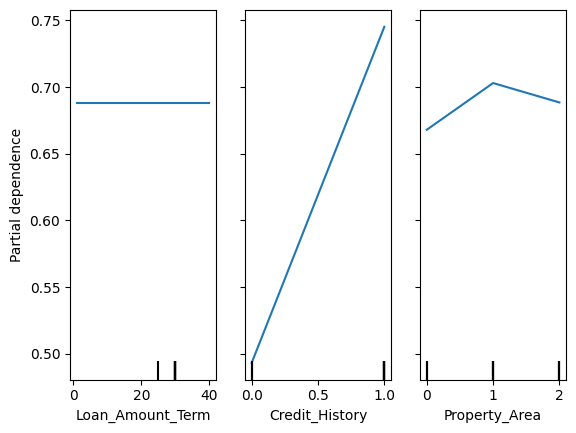

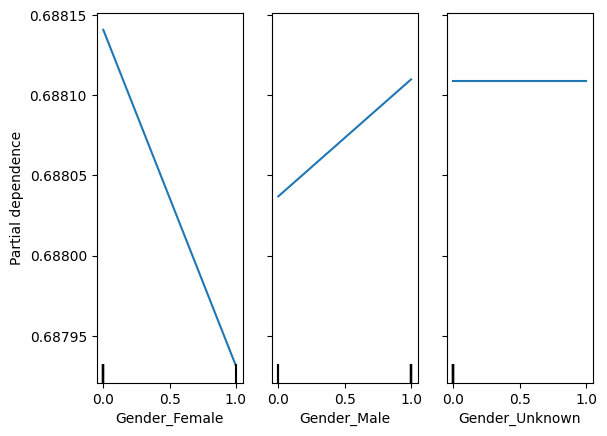

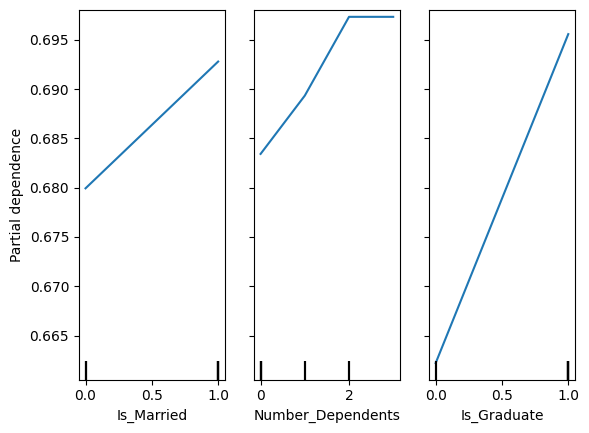

In [52]:
PartialDependenceDisplay.from_estimator(rf_model, X, X.columns[:3])
PartialDependenceDisplay.from_estimator(rf_model, X, X.columns[3:6])
PartialDependenceDisplay.from_estimator(rf_model, X, X.columns[6:9])
PartialDependenceDisplay.from_estimator(rf_model, X, X.columns[9:12])

# LIME

LIME is an explainer providing more information on local/single predictions.

It provides prediction probabilities, how each feature affects the prediction, and details of the feature itself.

This would be useful in scenarios of selecting wrong predictions and checking how their scoring was mode based on the weight and value.
<br>However since we're not allowed to drop noisy data points, we'll just leave this as is.

During a run, we saw Property_Area to be a large contributor, though it will certainly differ based on the sample being analyzed.

In [53]:
import lime
import lime.lime_tabular

In [54]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Loan_Status'], verbose=True, mode='classification')

In [68]:
exp = explainer.explain_instance(X_test.values[0], rf_model.predict_proba, num_features=10)

Intercept 0.6485688035453552
Prediction_local [0.68609906]
Right: 0.4854564641880042


C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [69]:
exp.show_in_notebook(show_table=True)

## <span style="color:blue">Recommendation</span>

This section details the next steps and improvements that can be done

## Features
`Credit_History` is an interesting feature as our global explainers seem to indicate that it's quite an important feature.
Leaving a binary to have that much sway over a simple flag could risk exposing us to False Positives. 
<br>Luckily LIME, showed that it's effect is much less observed in local predictions. 
<br>Still there could improvements made such as changing to credit score or a financial savings amounts in future data collection.


## Data
One of the concerns involves the low number of data points (641).  
Having more data can certainly help improve results as we'd be working with truths instead of imputation estimates.


Another concern is the data imblalance. 
<br>There's twice as many approvals than rejections, hence the model may be better fitted to the majority.

## Improvements
These issues can be addressed in the following ways but will require more tweaking.
### Class weights
Using the `class_weights`, we can add a slight bit of bias aimed towards the minority class of rejections.
<br>This should improve results with our rejections but may also decrease the Positive/Approval prediction scores.

### Resampling
There's an option to oversample or undersample in order to try to make both Classes equal in count.
<br>This could involve duplicating existing minority data points or splicing the majority.
<br>However it may become problematic in models using bagging, since oversampling will greatly increase the odds of sampling the same value numerous times within the same tree.

### Removing Uncertainties
One last option not permitted in this dataset is the dropping of noisy values.
<br>We saw the presence of numerours outliers in the dataset and know they can affect our fitting.
<br>A work around is to only predict on the most confident results to maximize `Precision`.
<br>However, our `Specificity` will start zeroing onwards as there is no longer any minority datapoints that can meet the confidence threshold.

In [57]:
xgb_cv.fit(X_train, y_train)
predictions = pd.DataFrame(xgb_cv.best_estimator_.predict_proba(X_test))
predictions['Confidence'] = predictions.max(axis=1)
predictions

0         1  Confidence
0    0.573115  0.426885    0.573115
1    0.216087  0.783913    0.783913
2    0.223160  0.776840    0.776840
3    0.239474  0.760526    0.760526
4    0.239474  0.760526    0.760526
..        ...       ...         ...
118  0.216087  0.783913    0.783913
119  0.239015  0.760985    0.760985
120  0.238641  0.761359    0.761359
121  0.256106  0.743894    0.743894
122  0.223160  0.776840    0.776840

[123 rows x 3 columns]

C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Specificity is ill-defined and being set t

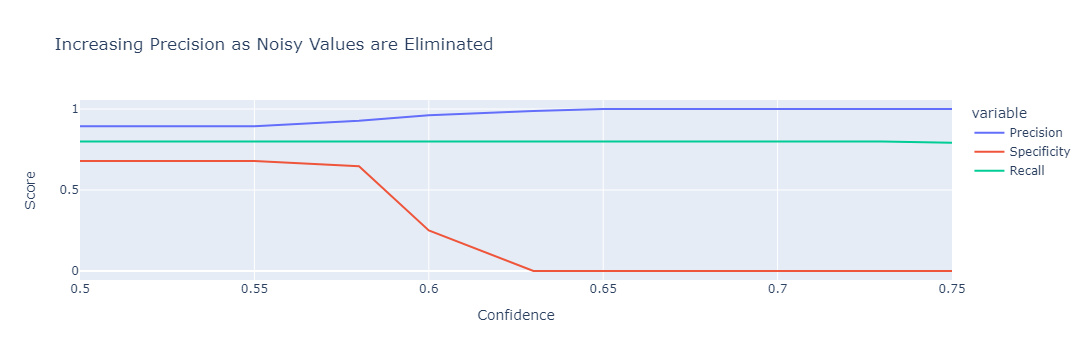

In [58]:
confident_scores = []
for confidence_threshold in np.arange(0.5, 0.76, 0.025):
    # PREDICT ONLY ON VALUS WITH THE HIGHEST PROBABILITY SCORES
    idx = predictions[predictions['Confidence'] > confidence_threshold].index
    confident_predictions = xgb_cv.predict(X_test.iloc[idx])

    # SCORE IT
    confident_scores.append([
        confidence_threshold.round(2),
        precision_score(confident_predictions, y_test.iloc[idx]),
        specificity_score(confident_predictions, y_test.iloc[idx]),
        recall_score(confident_predictions, y_test.iloc[idx])
    ])

df_confidence = pd.DataFrame(confident_scores, columns=['Confidence', 'Precision', 'Specificity', 'Recall']).set_index('Confidence')

px.line(df_confidence, labels={'value':'Score'},
       title='Increasing Precision as Noisy Values are Eliminated')